In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier  #GBM 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
hr = pd.read_csv("data/processed_data.csv")
hr = hr.drop(["Unnamed: 0"], axis=1)
target = "Attrition_Yes"
hr.head()

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.547619,0.715820,0.000000,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,...,1,0,0,0,0,1,1,0,0,0
1,0.738095,0.126700,0.250000,0.000484,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,...,0,0,0,1,1,0,0,0,1,0
2,0.452381,0.909807,0.035714,0.001451,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,...,0,1,0,0,0,1,0,0,1,0
3,0.357143,0.923407,0.071429,0.001935,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,...,0,0,1,0,0,1,0,0,1,0
4,0.214286,0.350036,0.035714,0.002903,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,...,0,0,0,1,1,0,0,0,1,0


In [3]:
hr.shape

(1470, 80)

In [4]:
# split train test
hr_labels = hr['Attrition_Yes']
hr = hr.drop(['Attrition_Yes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(hr, hr_labels, test_size=0.3, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 79)
(441, 79)
(1029,)
(441,)


## Logistics Regression

In [16]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.9024943310657596


[[364   6]
 [ 37  34]]


Text(0.5,1,'Accuracy Score: 0.9024943310657596')

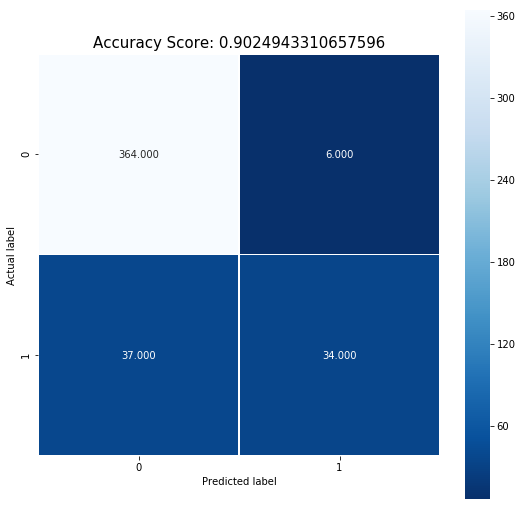

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## Logistic Prameter tuning(penalty L1 norm)

In [18]:
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    lr_tuning = LogisticRegression(penalty = 'l1', C = i)
    lr_tuning.fit(X_train,y_train)
    y_pred = lr_tuning.predict(X_test)
    acc_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1

acc_table

,C_parameter,Accuracy
0,0.001,0.839002
1,0.010,0.839002
2,0.100,0.857143
3,1.000,0.897959
4,10.000,0.891156
5,100.000,0.891156


## Logistic Prameter tuning(penalty L2 norm)

In [22]:
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]

acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    lr_tuning = LogisticRegression(penalty = 'l2', C = i)
    lr_tuning.fit(X_train,y_train)
    y_pred = lr_tuning.predict(X_test)
    acc_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    j += 1

acc_table

,C_parameter,Accuracy
0,0.001,0.839002
1,0.010,0.839002
2,0.100,0.888889
3,1.000,0.902494
4,10.000,0.895692
5,100.000,0.891156


## Gradient Boosting Method

Accuracy of the GBM on test set: 0.871
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       370
          1       0.68      0.38      0.49        71

avg / total       0.86      0.87      0.86       441



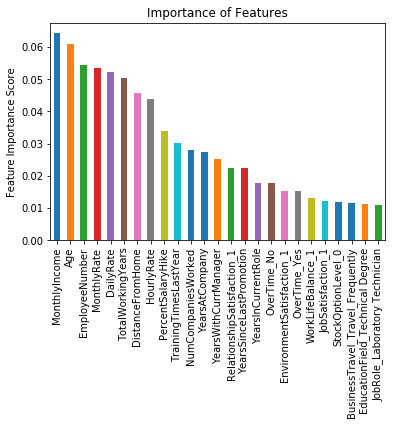

In [15]:
# GBM base model
# Base parameter setting
# n_estimators: The number of boosting stages to perform. 
base_args = {'max_depth': 3, 'n_estimators': 500, 'subsample': 1, 'random_state': 12,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}

base_model = GradientBoostingClassifier(learning_rate=0.1,**base_args)
base_model.fit(X_train,y_train)
predictors=list(X_train)

# Feature importance Top 10
feat_imp = pd.Series(base_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:25].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(base_model.score(X_test, y_test)))
pred=base_model.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.871
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       370
          1       0.67      0.39      0.50        71

avg / total       0.86      0.87      0.86       441



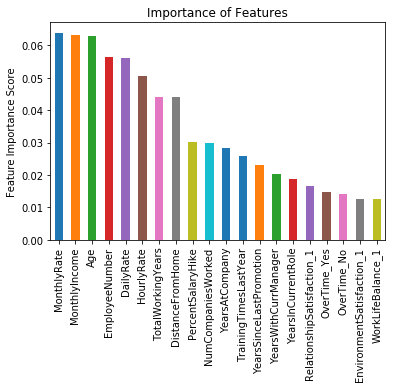

In [17]:
# Model Evaluation
model1_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model1 = GradientBoostingClassifier(**model1_args)
model1.fit(X_train,y_train)
predictors=list(X_train)

# Feature Importance
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:20].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.868
             precision    recall  f1-score   support

          0       0.89      0.97      0.93       370
          1       0.68      0.35      0.46        71

avg / total       0.85      0.87      0.85       441



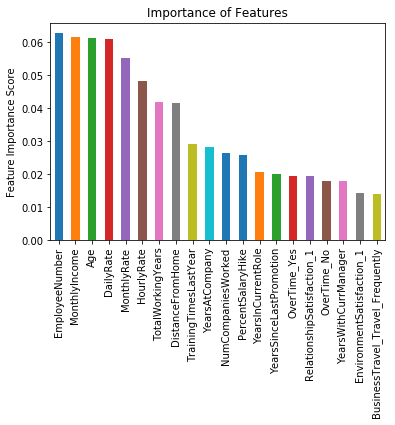

In [19]:
# Model Evaluation
model2_args = {'learning_rate': 0.05, 'n_estimators': 750, 'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'max_features':'sqrt'}
model2 = GradientBoostingClassifier(min_samples_leaf=1, min_samples_split=2, **model2_args)
model2.fit(X_train,y_train)
predictors=list(X_train)

# Feature Importance
feat_imp = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
feat_imp[:20].plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

# Accuracy
print('Accuracy of the GBM on test set: {:.3f}'.format(model2.score(X_test, y_test)))
pred=model2.predict(X_test)
print(classification_report(y_test, pred))

In [21]:
# Tunning Hyperparameters - Learning rate and estimators
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.85815, std: 0.01517, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.85428, std: 0.01926, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.85232, std: 0.01426, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.85327, std: 0.00867, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.85425, std: 0.01153, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.85909, std: 0.00606, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.85425, std: 0.01153, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.85715, std: 0.00837, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.85719, std: 0.01413, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.86204, std: 0.01247, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.85718, std: 0.01580, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.86106, std: 0.01361, params: {'learning_rate': 0.1, 'n

In [22]:
# Model evaluation
pred=tuning.predict(X_test)
print('Accuracy of the GBM on test set: {:.3f}'.format(tuning.score(X_test, y_test)))
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.846
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       370
          1       0.54      0.31      0.39        71

avg / total       0.82      0.85      0.83       441



In [23]:
# Tuning parameters - min sample splits, min sample leaf
base_args = {'learning_rate': 0.1, 'n_estimators': 1500, 'max_depth': 3, 'subsample': 1, 'random_state': 2,
            'max_features':'sqrt'}
p_test = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(**base_args), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.87078, std: 0.01617, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.87271, std: 0.01406, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.87465, std: 0.01793, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.87077, std: 0.02122, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.87369, std: 0.01316, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.86785, std: 0.01506, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.86494, std: 0.01588, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.86203, std: 0.01141, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.86202, std: 0.01446, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.86883, std: 0.01447, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.86883, std: 0.01447, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.86883, std: 0.01

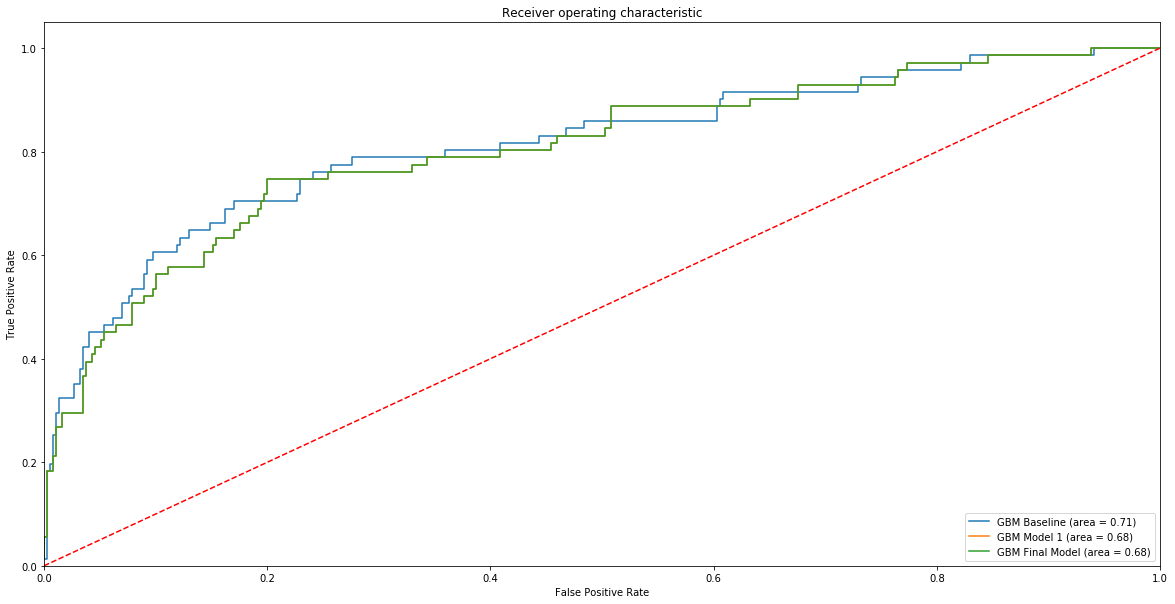

In [24]:
# Comparison of ROC AUC
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 

# base
base_model_args = {'max_depth': 3, 'n_estimators': 500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
base_model = GradientBoostingClassifier(learning_rate=0.1, **base_model_args)
base_model.fit(X_train,y_train)

# learning rate, estimators
model1_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model1 = GradientBoostingClassifier(**model1_args)
model1.fit(X_train,y_train)

# sample split, leaf
model2_args = {'learning_rate':0.1,'max_depth': 3, 'n_estimators': 1500, 'subsample': 1, 'random_state': 5,
            'min_samples_split': 2, 'min_samples_leaf':1, 'max_features':'sqrt'}
model2=GradientBoostingClassifier(**model2_args)
model2.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
base_roc_auc = roc_auc_score(y_test, base_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, base_model.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
model2_roc_auc = roc_auc_score(y_test, model2.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.figure(figsize=(20,10))
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % base_roc_auc)
plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % model2_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [13]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV

In [5]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
SVM_grid_search = GridSearchCV(svm.SVC(kernel='rbf', probability=True), param_grid, cv=10)
SVM_grid_search.fit(X_train, y_train)
SVM_grid_search.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [8]:
SVM_grid_search.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
print('Accuracy of the svm on test set: {:.3f}'.format(SVM_grid_search.score(X_test, y_test)))
pred=SVM_grid_search.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the svm on test set: 0.884
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       370
          1       0.79      0.38      0.51        71

avg / total       0.88      0.88      0.87       441



In [17]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)
print(svm_model.score(X_test, y_test)

0.8390022675736961

In [20]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
print('Accuracy of the svm on test set: {:.3f}'.format(svm_model.score(X_test, y_test)))
pred=svm_model.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the svm on test set: 0.839
             precision    recall  f1-score   support

          0       0.84      1.00      0.91       370
          1       0.00      0.00      0.00        71

avg / total       0.70      0.84      0.77       441



C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[363   7]
 [ 44  27]]


Text(0.5,1,'Accuracy Score: 0.8843537414965986')

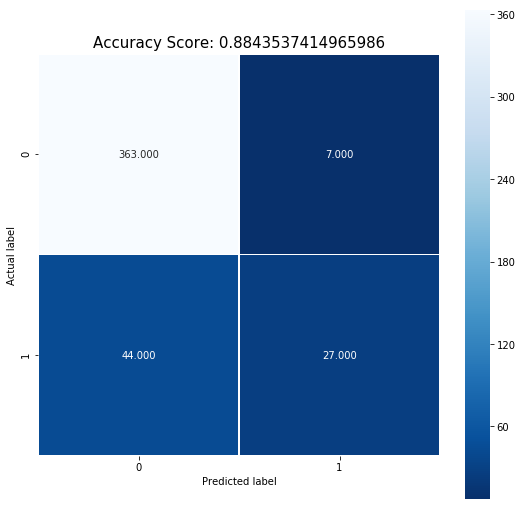

In [53]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = SVM_grid_search.score(X_test, y_test)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

## XGBoost

In [5]:
import xgboost as xgb

In [6]:
xgb_model = xgb.XGBClassifier()
params = {'learning_rate': [0.01, 0.05, 0.001],'max_depth': [6, 7, 8, 9], 'n_estimators': [5, 10, 100, 1000], 'seed': [12]}

In [7]:
xg_clf = GridSearchCV(xgb_model, params, n_jobs=5,  
                       scoring='roc_auc',
                       verbose=2, refit=True)

In [8]:
xg_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    9.1s
[Parallel(n_jobs=5)]: Done 144 out of 144 | elapsed:   49.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={'learning_rate': [0.01, 0.05, 0.001], 'max_depth': [6, 7, 8, 9], 'n_estimators': [5, 10, 100, 1000], 'seed': [12]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [28]:
xg_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=12, silent=True,
       subsample=1)

In [29]:
y_pred = xg_clf.predict(X_test)
score =  accuracy_score(y_test, y_pred)
score

C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8526077097505669

In [25]:
print('Accuracy of the XGB on test set: {:.3f}'.format(score))
pred = xg_clf.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the XGB on test set: 0.853
             precision    recall  f1-score   support

          0       0.88      0.96      0.92       370
          1       0.58      0.31      0.40        71

avg / total       0.83      0.85      0.83       441



C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[354  16]
 [ 49  22]]


Text(0.5,1,'Accuracy Score: 0.8526077097505669')

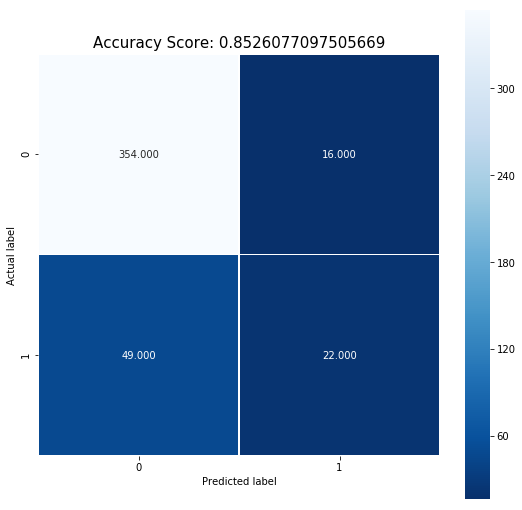

In [30]:
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

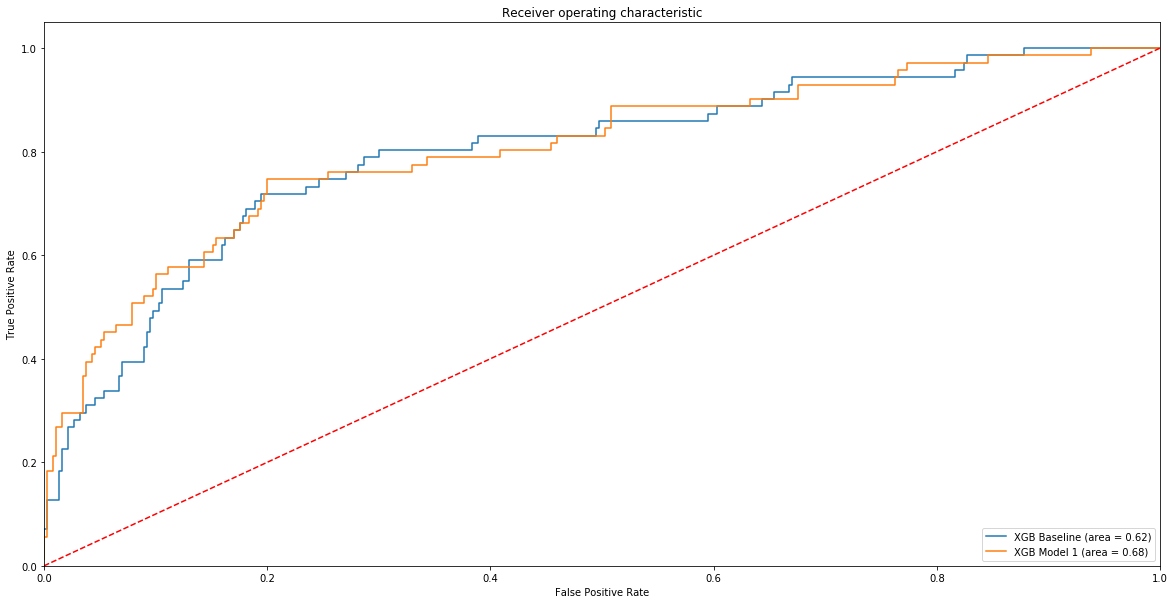

In [37]:
# base
base_xgb_model = GradientBoostingClassifier()
base_xgb_model.fit(X_train,y_train)

# tuning xgboost
xgb_tuning = xg_clf.best_estimator_
xgb_tuning.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
base_xgb_auc = roc_auc_score(y_test, base_xgb_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, base_xgb_model.predict_proba(X_test)[:,1])
#model 1
xgb_tuning_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 

plt.figure(figsize=(20,10))
plt.plot(fprB, tprB, label='XGB Baseline (area = %0.2f)' % base_xgb_auc)
plt.plot(fpr1, tpr1, label='XGB Model 1 (area = %0.2f)' % xgb_tuning_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 투표기반 분류기

In [54]:
from sklearn.ensemble import VotingClassifier

+ 위에서 분석한 SVM Logistics Regression Gradient Boosting 방법을 종합하여 투표기반 분류기를 통해서 데이터를 분석
    - 투표기반 분류기는 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것입니다.

In [55]:
log_clf = LogisticRegression(C=1, penalty="l2")
svm_clf = SVM_grid_search.best_estimator_
gbc_clf = tuning.best_estimator_
xgb_clf = xg_clf.best_estimator_

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('gbc', gbc_clf), ('svm', svm_clf)],
                             voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, svm_clf, gbc_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9024943310657596
SVC 0.8843537414965986
GradientBoostingClassifier 0.8662131519274376
VotingClassifier 0.891156462585034


C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [56]:
voting_clf2 = VotingClassifier(estimators=[('lr', log_clf), ('svm', svm_clf)], voting='hard')
voting_clf2.fit(X_train, y_train)

for clf in (log_clf, svm_clf, voting_clf2):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9024943310657596
SVC 0.8843537414965986
VotingClassifier 0.8888888888888888


C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [57]:
log_clf = LogisticRegression(C=1, penalty="l2")
svm_clf = SVM_grid_search.best_estimator_
gbc_clf = tuning.best_estimator_
xgb_clf = xg_clf.best_estimator_

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('gbc', gbc_clf), ('svm', svm_clf),('xgb', xgb_clf)],
                             voting='hard')

voting_clf.fit(X_train, y_train)

for clf in (log_clf, svm_clf, gbc_clf, xgb_clf, voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9024943310657596
SVC 0.8843537414965986
GradientBoostingClassifier 0.8662131519274376


C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


XGBClassifier 0.8526077097505669
VotingClassifier 0.8843537414965986


C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\LeeMH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


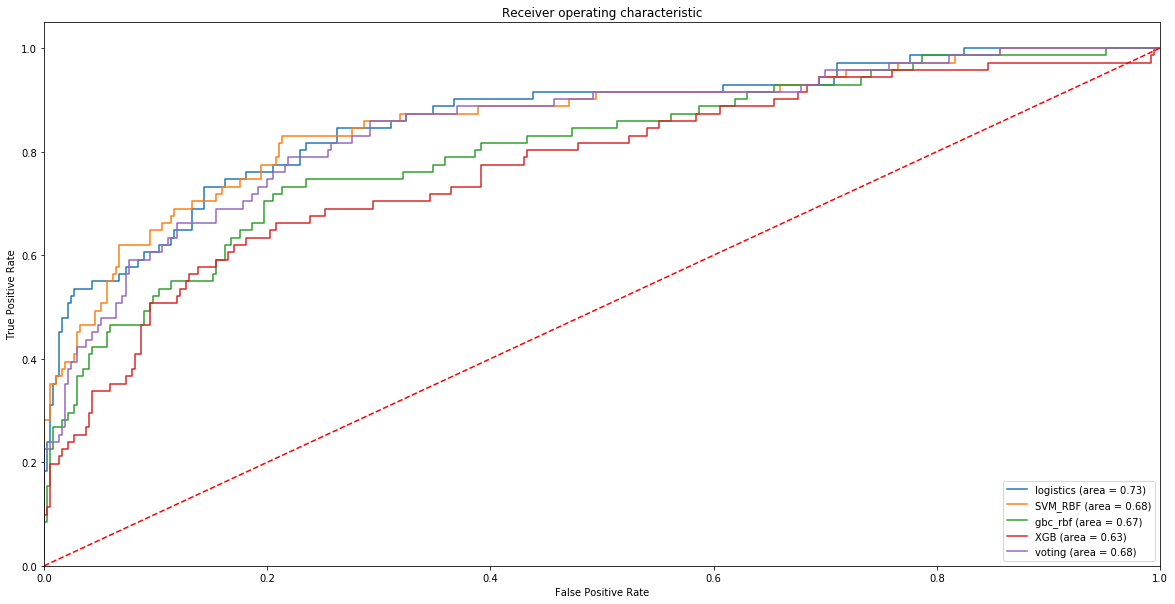

In [60]:
log_clf = LogisticRegression(C=1, penalty="l2")
log_clf.fit(X_train, y_train)
svm_clf = SVM_grid_search.best_estimator_
gbc_clf = tuning.best_estimator_
xgb_clf = xg_clf.best_estimator_
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('gbc', gbc_clf), ('svm', svm_clf),('xgb', xgb_clf)],voting='soft')

voting_clf.fit(X_train, y_train)
#calculate values for ROC AUC plot
#logistic model
log__roc_auc = roc_auc_score(y_test, log_clf.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, log_clf.predict_proba(X_test)[:,1])
# svm model
svm_roc_auc = roc_auc_score(y_test, svm_clf.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, svm_clf.predict_proba(X_test)[:,1])
# gradient boosting model
gbc_roc_auc = roc_auc_score(y_test, gbc_clf.predict(X_test))
fpr2, tpr2, thresholds2 = roc_curve(y_test, gbc_clf.predict_proba(X_test)[:,1])
# xgboosting model
xgb_roc_auc = roc_auc_score(y_test, xgb_clf.predict(X_test))
fpr3, tpr3, thresholds3 = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
# voting model
votting_roc_auc = roc_auc_score(y_test, voting_clf.predict(X_test))
fpr4, tpr4, thresholds4 = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])

plt.figure(figsize=(20,10))
plt.plot(fprB, tprB, label='logistics (area = %0.2f)' % log__roc_auc)
plt.plot(fpr1, tpr1, label='SVM_RBF (area = %0.2f)' % svm_roc_auc)
plt.plot(fpr2, tpr2, label='gbc_rbf (area = %0.2f)' % gbc_roc_auc)
plt.plot(fpr3, tpr3, label='XGB (area = %0.2f)' % xgb_roc_auc)
plt.plot(fpr4, tpr4, label='voting (area = %0.2f)' % votting_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
data = {'algorithm':['logistics Regression', 'SVM', 'Grad_Boosting', 'Xgboosting', 'Voting'], 'acc(%)':[90.2, 88.4, 86.6, 85.2, 89.1]}
acc_df = pd.DataFrame(data)
acc_df

,algorithm,acc(%)
0,logistics Regression,90.2
1,SVM,88.4
2,Grad_Boosting,86.6
3,Xgboosting,85.2
4,Voting,89.1


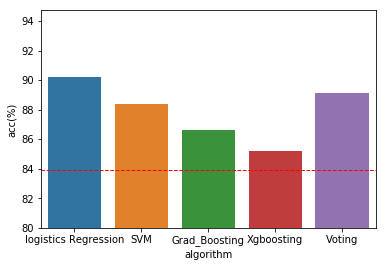

In [51]:
bar = sns.barplot(x = 'algorithm', y = 'acc(%)', data=acc_df)
bar.set_ylim(80,)
bar.axhline(y=83.9, color='r', linestyle='--', linewidth=1)